# 5.1 MNIST

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Training data
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Testing data
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


In [3]:
# plt.imshow(train[10][0].squeeze(0).numpy())
def viz_img(mat):
    if mat.shape.__len__() == 3:
        mat = mat.squeeze(0)
        
    plt.imshow(mat.numpy())

def viz_pred(logits):
    plt.bar(np.arange(0, 10), logits.squeeze(0).detach().numpy())
    plt.xticks(np.arange(0, 10))

    plt.show()
    

(torch.Size([1, 28, 28]), 1, None)

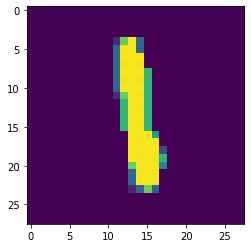

In [11]:
train[200][0].shape, train[200][1], viz_img(train[200][0])

In [16]:
train[0][0].shape, train[0][0].view(1, 28*28)

(torch.Size([1, 28, 28]),
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [19]:
class NonLin(torch.nn.Module):

    def __init__(self):
        super().__init__()
        
        self.t1 = torch.nn.Linear(28*28, 49) # 10 + 10
        self.t3 = torch.nn.Linear(49, 10) # 10 + 1
        
    def forward(self, x):
        x = F.sigmoid(self.t1(x))
        x = F.sigmoid(self.t2(x))
        x = torch.softmax(self.t3(x), dim=1)
        return x
net = NonLin()

  0%|          | 0/6000 [00:00<?, ?it/s]

/home/priyansh/Dev/perm/conda/envs/main/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


  0%|          | 0/6000 [00:00<?, ?it/s]

Train Accuracy:  0.925
Train Loss:  1.4666955471038818


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

Train Accuracy:  0.945
Train Loss:  1.705884337425232


  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

Train Accuracy:  0.957
Train Loss:  1.4988545179367065


In [30]:
logits = net(test[39][0].view(1,784)).squeeze(0)
logits

tensor([1.4610e-11, 9.9994e-01, 9.5859e-06, 3.1161e-06, 1.1032e-07, 1.8001e-08,
        1.1623e-07, 4.3876e-06, 4.1602e-05, 4.6102e-07],
       grad_fn=<SqueezeBackward1>)

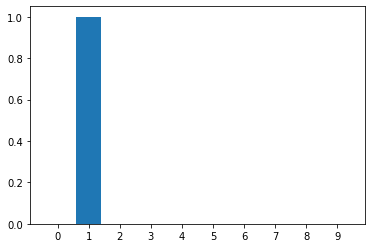

(None, None)

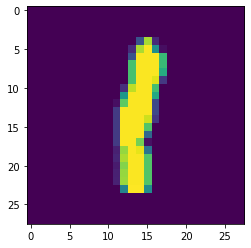

In [31]:
viz_pred(logits), viz_img(test[39][0])